# Useful Statistical Functions

## ecdf function

The ecdf function is used to create an empirical cumulative distribution function, this is just a way to show a distribution function that reduced binning biase.

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / len(x)

    return x, y

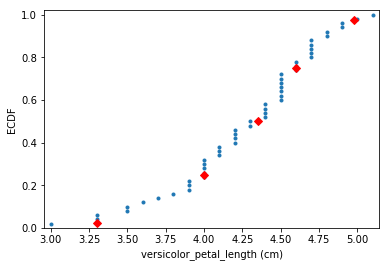

In [3]:
# ecdf function : example plotting ecdf

#import some pandas data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.sampledata.iris import flowers

versicolor_petal_length=(flowers.loc[flowers['species'] == 'versicolor'])['petal_length']

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / len(x)

    return x, y

x,y = ecdf(versicolor_petal_length)

# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor_petal_length,percentiles)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers,linestyle='none',marker='.')

# Make the margins nice
plt.margins(0.02)

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# pearson correlation coefficient function

Pearson's correlation coefficient measures how close the realtionship is between variables, ie to what extent does a variable  change relative to another. 

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [4]:
# Example : Computing the Pearson correlation coefficient

# import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from bokeh.sampledata.iris import flowers
versicolor_petal_length=(flowers.loc[flowers['species'] == 'versicolor'])['petal_length']
versicolor_petal_width=(flowers.loc[flowers['species'] == 'versicolor'])['petal_width']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.786668088523


# bernoulli trials function

Bernoulli Trials are trials where there are binanry outputs like coin tosses the result is either a head or a tail a success or a failure. 

In [ ]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+= 1

    return n_success

In [24]:
# Example : using perform_bernoulli_trials?

import numpy as np
import matplotlib.pyplot as plt

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+= 1

    return n_success

# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True,histtype='step')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

# successive poissons function

A poisson distribution is a binomial distribution for rarely occuring events, poisson events assume that the next event will not be dependent on when the last occured and the time frame between poisson events forms an exponential distribution. 

In [ ]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

In [6]:
# Example :  Perform Successive poissons function to find the Distribution of no-hitters and cycles

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764 ,715, size=100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100, normed=True,histtype='step')

# Label axes
_=plt.xlabel('PDF')
_=plt.ylabel('no-hitters and cycles')

# Show the plot
plt.show()

# bootstrap replicate function

A bootstrap replicate is a statistical summary generate from data produced by a bootstrap function, it is used to simulate re- running a test over and over again by repedatively resampling the original data.

In [ ]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

299862.7
299860.4
299856.4


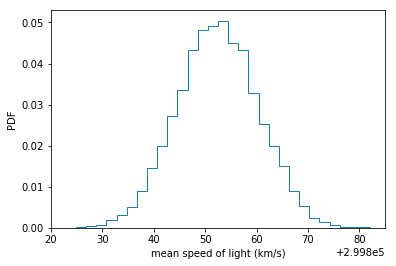

[ 299837.1  299867.5]


In [25]:
# Example: bootstrap function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import michelson_speed_of_light data
filename='Data/michelson_speed_of_light.csv'
michelson_speed_of_light=(pd.read_csv(filename,encoding = "ISO-8859-1", sep=',')).dropna()
michelson_speed_of_light=michelson_speed_of_light.values[:,13]

# create a bootstrap function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# produce a set of bootstrap means
print(bootstrap_replicate_1d(michelson_speed_of_light, np.mean))
print(bootstrap_replicate_1d(michelson_speed_of_light, np.mean))
print(bootstrap_replicate_1d(michelson_speed_of_light, np.mean))

# create an empty array
bs_replicates = np.empty(10000)

# populate array with for loop
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(
    michelson_speed_of_light, np.mean)
    
# plot a histogram
_ = plt.hist(bs_replicates, bins=30, normed=True,histtype='step')
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

# Calculate the a bootstrap 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

# Draw bs replicates function

Generating many bootstrap replicates

In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [ ]:
# Example : A one-sample bootstrap hypothesis test

import numpy as np
import pandas as pd

# import data
filename='Data/frog_tongue.csv'
df=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',')
force_a=(df[df.loc[:, 'ID'] == 'II'].loc[:,'impact force (mN)'])
force_b=(df[df.loc[:, 'ID'] == 'IV'].loc[:,'impact force (mN)'])

# create a bootstrap function
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Make an array of translated impact forces: translated_force_b
translated_force_b = [num  - np.mean(force_b) + 0.55 for num in force_b]

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


 ## pairs bootstrap function for linear regression
 
A pairs bootstrap function is used to resample an index so that the resamples index can then be used to resample multiple variables while relating the relationship between pairs of variables in the data set.

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [26]:
# Example : Using draw bootstrap Pairs for linear regression of literacy/fertility data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# import the data
filename='Data/literacy_birth_rate.csv'
data=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',')
literacy=data.iloc[:,2]
illiteracy=100-literacy
fertility=data.iloc[:,3]

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True,histtype='step')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

[ 0.04186203  0.05581358]


# permutation Sample Function

A permutation sample is used in hypothesis testing to take a dataset originally from multiple datasets and resample it so that  the data from the originals is randomly interdispersed.

In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    #print(np.mean(perm_sample_1))
    #print(np.mean(perm_sample_2))
    return perm_sample_1, perm_sample_2

In [6]:
# Example Generating a permutation sample function

import numpy as np
import pandas as pd

# import data
filename='Data/2008_swing_states.csv'
data=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',')
data=np.array(data.dropna())
dataPA=(data[data[:,0] == 'PA']) #data for PA
dataOH=(data[data[:,0] == 'OH']) #data for OH
print(np.mean(dataPA[:,5]))
print(np.mean(dataOH[:,5]))

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

permutation_sample(dataPA[:,5], dataOH[:,5])

45.476417910447765
44.31818181818181


(array([45.31, 40.09, 40.1, 49.79, 46.33, 38.01, 36.06, 48.46, 32.88, 43.78,
        27.32, 33.56, 54.74, 43.12, 46.73, 56.24, 40.11, 45.89, 43.82,
        55.97, 45.88, 48.62, 46.39, 53.53, 47.61, 60.5, 34.58, 36.54, 57.81,
        39.43, 41.21, 47.47, 31.75, 54.66, 58.23, 58.36, 41.97, 63.1, 43.05,
        60.08, 56.94, 45.6, 50.46, 47.43, 39.92, 40.47, 34.01, 32.12, 33.57,
        35.22, 31.04, 48.73, 39.86, 83.56, 42.2, 46.07, 28.79, 47.87, 60.49,
        48.76, 40.24, 54.37, 25.34, 41.32, 45.26, 42.23, 36.07], dtype=object),
 array([46.15, 44.69, 42.97, 34.84, 45.45, 69.64, 49.81, 53.61, 54.58,
        51.38, 38.53, 32.97, 54.59, 38.11, 39.67, 42.38, 44.71, 68.02,
        38.07, 52.76, 35.47, 50.36, 50.1, 41.77, 48.61, 38.62, 46.85, 47.75,
        44.03, 36.43, 54.64, 63.57, 38.25, 37.72, 29.07, 52.4, 38.23, 57.01,
        48.56, 40.18, 39.26, 42.65, 31.47, 49.58, 52.2, 44.9, 44.08, 47.01,
        49.44, 54.25, 53.16, 40.64, 48.36, 41.56, 37.26, 51.28, 37.53,
        50.96, 43.92,

# multiple permutation replicates function


In [1]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

## difference of means function

This function simply calculates the differnce in mean between 2 datasets, this can be used in hypothesis testing if your hypothesis that the 2 datasets are the very similar to each other - in which case you might expect them to have the same means.

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

In [5]:
# Example : Permutation test on frog data

import numpy as np
import pandas as pd

# define function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# import data
filename='Data/frog_tongue.csv'
df=pd.read_csv(filename,encoding = "ISO-8859-1", sep=',')
force_a=(df[df.loc[:, 'ID'] == 'II'].loc[:,'impact force (mN)'])
force_b=(df[df.loc[:, 'ID'] == 'IV'].loc[:,'impact force (mN)'])

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)
print('difference in empirical means =', empirical_diff_means)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

difference in empirical means = 288.25
p-value = 0.004


## Compute log loss

In [ ]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
         actual when these are 1D arrays.

         :param predicted: The predicted probabilities as floats between 0-1
         :param actual: The actual binary labels. Either 0 or 1.
         :param eps (optional): log(0) is inf, so we need to offset our
         predicted values slightly by eps from 0 or 1.
     """

    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
        + (1 - actual)
        * np.log(1 - predicted))

    return loss

## multilabel_sample

In [ ]:
def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])

## multilabel_sample_dataframe

In [ ]:
def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


## multilabel_train_test_split

In [ ]:
def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])


<a href="https://studiolab.sagemaker.aws/import/github/davidcoxon/Python/blob/master/Reference/Useful_Functions.ipynb">
  <img src="https://studiolab.sagemaker.aws/studiolab.svg" alt="Open In SageMaker Studio Lab"/></a>